# Rigol Waveform Creator
## Jan 2016
This is an updated interface to the DG4102 arb generator. It makes use of the usbtmc python library installed via `dnf install python3-usbtmc`. The basic interface is to create a handle to the instrument and then use `write`, `read`, or `ask` methods on the handle.

In [1]:
import numpy
import matplotlib.pyplot as plt
import usbtmc
%matplotlib inline

In [2]:
# this connects to the instrument directly using it's USB ID:
handle = usbtmc.Instrument(int("1AB1",16),int("0641",16))

In [3]:
# This will probably timeout the first time. Just run it again
handle.ask('*IDN?')

'Rigol Technologies,DG4102,DG4B151400125,00.01.04'

In [4]:
# set voltage high
handle.write(":VOLT:HIGH 2.00")

In [24]:
handle.write(":SOUR1:APPL:USER 100,5,2.5,0")

In [28]:
handle.ask(":VOLTage:HIGH?")

'2.000000E+00'

In [31]:
handle.ask(":DATA:POINts? VOLATILE")

'40'

Now do some waveform creation:

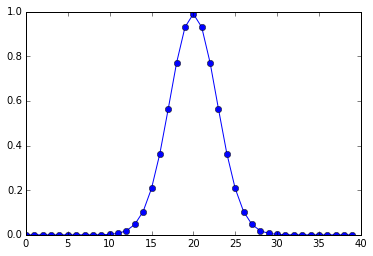

In [37]:
N = 40
x = numpy.array(range(40))
data = 0.99*numpy.exp(-((x-20)/4)**2)
plt.plot(data,"o-")

In [38]:
handle.write(":DATA:POINTS VOLATILE,{}".format(N))

In [39]:
handle.ask(":DATA:POINTS? VOLATILE")

'40'

In [40]:
datastring = str(list(data))
cleandatastring = datastring.lstrip("[").rstrip("]")
print(cleandatastring)

1.374906442631438e-11, 1.5734970993571205e-10, 1.5891757746337554e-09, 1.4164169499382011e-08, 1.1140982297206653e-07, 7.7333745142214458e-07, 4.7372662182077183e-06, 2.560941922042758e-05, 0.00012217570604581277, 0.00051437893533329011, 0.0019111495948654321, 0.0062664182732108898, 0.018132482499846836, 0.046302916160119389, 0.10434523231624569, 0.20751527327958683, 0.36420064675972791, 0.56408499648361377, 0.77101277524069078, 0.93001893218534104, 0.98999999999999999, 0.93001893218534104, 0.77101277524069078, 0.56408499648361377, 0.36420064675972791, 0.20751527327958683, 0.10434523231624569, 0.046302916160119389, 0.018132482499846836, 0.0062664182732108898, 0.0019111495948654321, 0.00051437893533329011, 0.00012217570604581277, 2.560941922042758e-05, 4.7372662182077183e-06, 7.7333745142214458e-07, 1.1140982297206653e-07, 1.4164169499382011e-08, 1.5891757746337554e-09, 1.5734970993571205e-10


In [41]:
handle.write(":DATA VOLATILE, " + cleandatastring)

In [54]:
from time import sleep

In [109]:
# For some reason, it can only pull 38 values.
wave = []
for i in range(1,38):
    #sleep(2)
    wave.append( handle.ask(":DATA:VALUE? VOLATILE,{}".format(i)) )
    
len(wave)

37

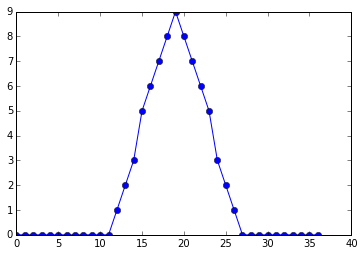

In [110]:
plt.plot(wave,"o-")

## Now to reverse engineer the VCA response:

In [90]:
def VfromI(Intensity):
    """Implement the inverted response function. See data fit in google drive AOM folder."""
    V = (.0039757327 + (.0039757327 ** 2 + 4 *.0078826605 * Intensity) ** (1/2))/(2*.0078826605)
    return V

In [99]:
voltages = VfromI(data)
floats = voltages/voltages.max()
floats
#datastring = str(list(floats))
datastring = numpy.array_str(floats,precision=4)
#cleandatastring = datastring.lstrip("[").rstrip("]")
#cleandatastring

In [101]:
commas = ",".join(datastring.split())
stripped = commas.strip("[]")
clean = stripped.lstrip(",").rstrip(",")
clean

'0.044,0.044,0.044,0.044,0.044,0.044,0.0441,0.0446,0.0465,0.0533,0.0703,0.1028,0.1561,0.2346,0.3402,0.4702,0.6154,0.7604,0.8851,0.9699,1.,0.9699,0.8851,0.7604,0.6154,0.4702,0.3402,0.2346,0.1561,0.1028,0.0703,0.0533,0.0465,0.0446,0.0441,0.044,0.044,0.044,0.044,0.044'

In [102]:
handle.write(":DATA:POINTS VOLATILE,40")

In [103]:
handle.write(":DATA:VAL VOLATILE," + clean)

In [108]:
for i in range(1,len(floats)-1):
    command_string = ":DATA:VAL VOLATILE," + str(i) + "," + str(10*floats[i])
    check_string = ":DATA:VAL? VOLATILE," + str(i)
    handle.write(command_string)
    print(command_string)
    #print(rgdg.write(check_string))
#print(rgdg.write(":DATA:VAL ue? VOLATILE,0"))
#print(command_string)

:DATA:VAL VOLATILE,1,0.440039094584
:DATA:VAL VOLATILE,2,0.440039408793
:DATA:VAL VOLATILE,3,0.440042168317
:DATA:VAL VOLATILE,4,0.44006350725
:DATA:VAL VOLATILE,5,0.440208701257
:DATA:VAL VOLATILE,6,0.441076194588
:DATA:VAL VOLATILE,7,0.445588973592
:DATA:VAL VOLATILE,8,0.465389704783
:DATA:VAL VOLATILE,9,0.533196365475
:DATA:VAL VOLATILE,10,0.702678058368
:DATA:VAL VOLATILE,11,1.02842964629
:DATA:VAL VOLATILE,12,1.5614279381
:DATA:VAL VOLATILE,13,2.34596915899
:DATA:VAL VOLATILE,14,3.40192670855
:DATA:VAL VOLATILE,15,4.70189138573
:DATA:VAL VOLATILE,16,6.15445627463
:DATA:VAL VOLATILE,17,7.60374650767
:DATA:VAL VOLATILE,18,8.85144231281
:DATA:VAL VOLATILE,19,9.69925633809
:DATA:VAL VOLATILE,20,10.0
:DATA:VAL VOLATILE,21,9.69925633809
:DATA:VAL VOLATILE,22,8.85144231281
:DATA:VAL VOLATILE,23,7.60374650767
:DATA:VAL VOLATILE,24,6.15445627463
:DATA:VAL VOLATILE,25,4.70189138573
:DATA:VAL VOLATILE,26,3.40192670855
:DATA:VAL VOLATILE,27,2.34596915899
:DATA:VAL VOLATILE,28,1.5614279381
:DA

In [116]:
# Check what the instrument memory holds
# For some reason, it can only pull 38 values.
wave = []
for i in range(1,41):
    #sleep(2)
    wave.append( handle.ask(":DATA:VALUE? VOLATILE,{}".format(i)) )
    
len(wave)

40

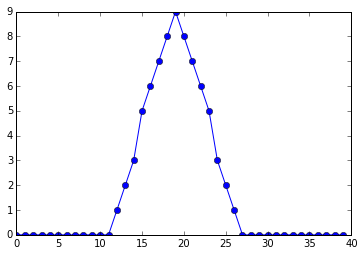

In [117]:
plt.plot(wave,"o-")

## TODO: the VfromI function gives voltage, we need to scale this before uploading to Arb.

In [118]:
handle.close()